### Import all the requirements

In [2]:
import pandas as pd
from openpyxl import load_workbook
import glob
import seaborn as sns
%matplotlib inline

### Step1: Aggregate the sales data from multiple excel sheets

In [3]:
txtfiles = []

# Intention: Iterate over all the excel files in the sales data folder & create a combined dataframe
overall_sales_data_df = None
for make_level_sales_file in glob.glob("./sales-data/*.xlsx"):
    sales_data_dict = {}
    sales_data_df =None
    sheets = load_workbook(make_level_sales_file, read_only=True).sheetnames
    print(make_level_sales_file)
    # Step 1A: Iterate over all the sheets to get year-wise data for the make example: Hyundau - 2022, 2021 etc data
    for sheet in sheets:
        sales_data_dict[sheet] = pd.read_excel(open(make_level_sales_file,'rb'), sheet_name=sheet)
        if sales_data_df is None:
            sales_data_df = sales_data_dict[sheet]
        else:
            sales_data_df = pd.merge(sales_data_df, sales_data_dict[sheet], on=["Maker/Brand", "Group", "Type", "Model","Segment"])
    # Step 1B: Add this make level df to the overall sales df
    if overall_sales_data_df is None:
        overall_sales_data_df = sales_data_df
    else:
        overall_sales_data_df = pd.concat([overall_sales_data_df,sales_data_df])
    

./sales-data/Honda_dataset.xlsx
./sales-data/Datsun_dataset.xlsx
./sales-data/Suzuki_dataset.xlsx
./sales-data/Mahindra_dataset.xlsx
./sales-data/Skoda_dataset.xlsx
./sales-data/VW_dataset.xlsx
./sales-data/Tata_dataset.xlsx
./sales-data/Hyundai_dataset.xlsx
./sales-data/Toyota_dataset.xlsx
./sales-data/Renault_dataset.xlsx


In [4]:
overall_sales_data_df

,Group,Maker/Brand,Type,Segment,Model,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,...,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00
0,Honda,Honda,Cars,A,Amaze,5295.0,3485.0,3406.0,-,-,...,1667.0,1031.0,775.0,1014.0,1379.0,1980.0,2989.0,1062.0,1152.0,1685.0
1,Honda,Honda,Cars,B,Fit (Jazz),420.0,420.0,120.0,-,-,...,3013.0,642.0,951.0,1079.0,3418.0,2334.0,2947.0,2879.0,2220.0,1924.0
2,Honda,Honda,Cars,C,City,5638.0,4468.0,5824.0,-,-,...,6424.0,5873.0,4183.0,4999.0,4687.0,5614.0,6559.0,4864.0,4439.0,5041.0
3,Honda,Honda,UVs/MPVs,SUV-B,WR-V,510.0,510.0,390.0,-,-,...,1680.0,3294.0,2824.0,4323.0,4874.0,5201.0,4877.0,3344.0,3611.0,5211.0
0,Renault-Nissan Alliance,Datsun,Cars,A,Redi-GO,NaN,NaN,NaN,NaN,NaN,...,1551.0,1981.0,1977.0,2791.0,2474.0,3042.0,2514.0,2339.0,3001.0,2298.0
1,Renault-Nissan Alliance,Datsun,Cars,B,Go,NaN,NaN,NaN,NaN,NaN,...,1072.0,1309.0,1288.0,1696.0,745.0,1069.0,770.0,646.0,1025.0,858.0
2,Renault-Nissan Alliance,Datsun,UVs/MPVs,MPV,Go+,NaN,NaN,NaN,NaN,NaN,...,624.0,1011.0,767.0,1147.0,544.0,586.0,317.0,478.0,380.0,499.0
0,Suzuki,Suzuki,Cars,A,Alto,13079.0,12123.0,8022.0,-,-,...,23437.0,20664.0,25610.0,18558.0,24665.0,24558.0,23085.0,21438.0,25146.0,20615.0
1,Suzuki,Suzuki,Cars,A,Celerio,10585.0,10531.0,8483.0,-,-,...,9856.0,7713.0,8470.0,8291.0,10576.0,10360.0,9451.0,9134.0,8641.0,6102.0
2,Suzuki,Suzuki,Cars,A,Wagon R,20457.0,21038.0,18527.0,-,-,...,15067.0,14048.0,16059.0,11415.0,14566.0,14670.0,13993.0,13053.0,13969.0,11803.0


### Step 2: Popularity Index Calculation Based on the Sales Data

In [5]:
# Step 2.A: Using melt transposed the data to get Monthly level sales at Make-Model-Month level
overall_sales_data_df = overall_sales_data_df.melt(id_vars=["Group", "Maker/Brand","Type","Segment","Model"], 
        var_name="Month", 
        value_name="Sales")

In [6]:
# Step 2.B Remove Not Numeric records from Sales Data
overall_sales_data_df["Sales"] = overall_sales_data_df["Sales"].apply(lambda s: pd.to_numeric(s, errors='coerce'))
overall_sales_data_df = overall_sales_data_df[overall_sales_data_df["Sales"].notna()]

In [7]:
# Step 2.C: Create Monthly Segment Sales
overall_sales_data_df["Monthly_Segment_Sales"] = overall_sales_data_df["Sales"].groupby([overall_sales_data_df["Month"],overall_sales_data_df["Segment"]]).transform('sum')
overall_sales_data_df["Percentage_Contribution"] = (overall_sales_data_df["Sales"] /overall_sales_data_df["Monthly_Segment_Sales"])*100


In [8]:
overall_sales_data_df["Percentage_Contribution"]

0        8.219880
1        0.805833
2       21.143821
3        1.757166
7       20.303647
          ...    
3091     1.104939
3092     0.000000
3093    34.930579
3094    39.026801
3095     9.468848
Name: Percentage_Contribution, Length: 2685, dtype: float64

<AxesSubplot:>

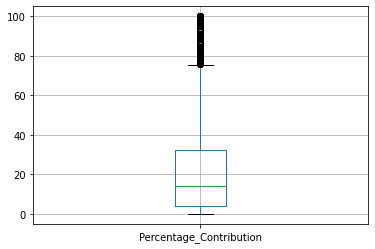

In [9]:
overall_sales_data_df.boxplot(column='Percentage_Contribution', return_type='axes')

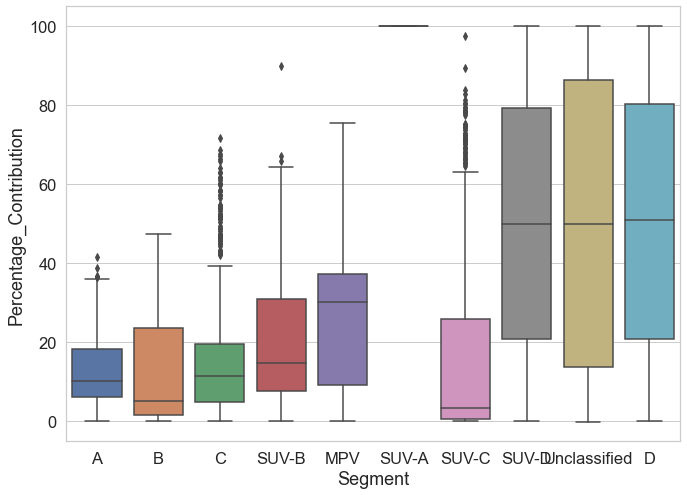

In [10]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

sns.boxplot(x="Segment", y="Percentage_Contribution", data=overall_sales_data_df);